# **Kaggle Environment Setup:**

In [1]:
!pip install "scikit-learn<1.4" umap-learn

INFO: pip is looking at multiple versions of umap-learn to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: umap-learn
    Found existing installation: umap-learn 0.5.9.post2
    Uninstalling umap-learn-0.5.9.post2:
      Successfully uninstalled umap-learn-0.5.9.post2


In [ ]:
# No need to install extra libraries in here, Kaggle already have them pre-installed
# import library
import gensim
import dotenv
import gradio
import jupyter
import keras
import matplotlib
import nltk
import numpy
import pandas
import plotly
import seaborn
import sklearn
import tensorflow
import tensorflow_hub
import umap

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

2025-10-19 10:44:59.278897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760870699.666039      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760870699.794961      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


gensim: 4.3.3
tensorflow: 2.18.0
keras: 3.8.0


**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic0.png?raw=True)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [5]:
import pandas as pd

### training data
anger_train = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [7]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [8]:
### testing data
anger_test = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/kaggle/input/lab2-initial-data/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [9]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [10]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


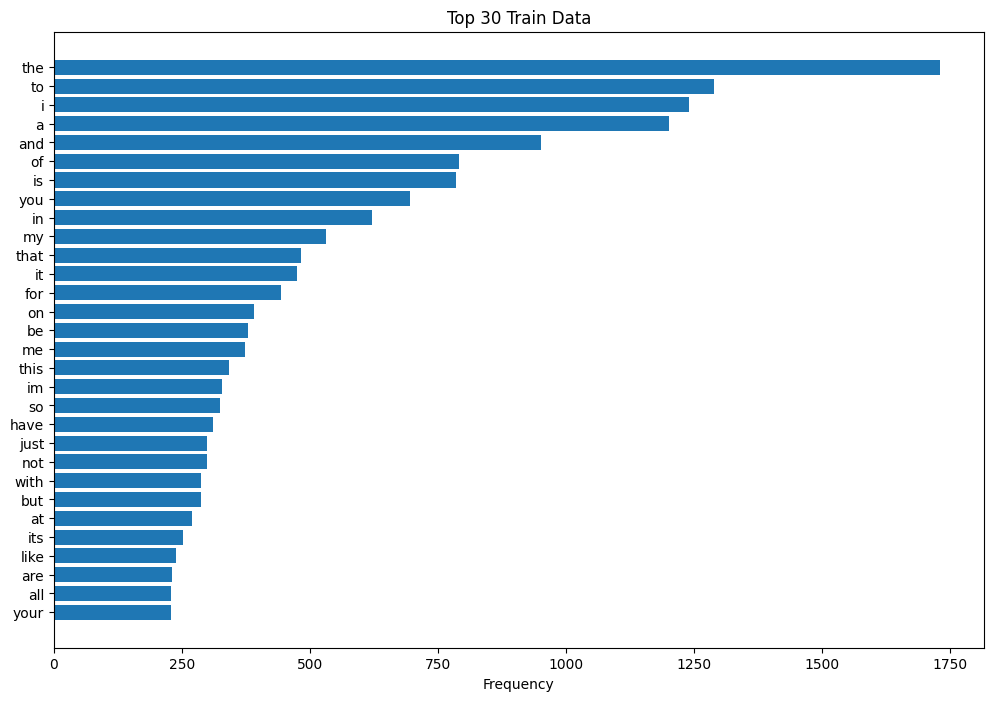

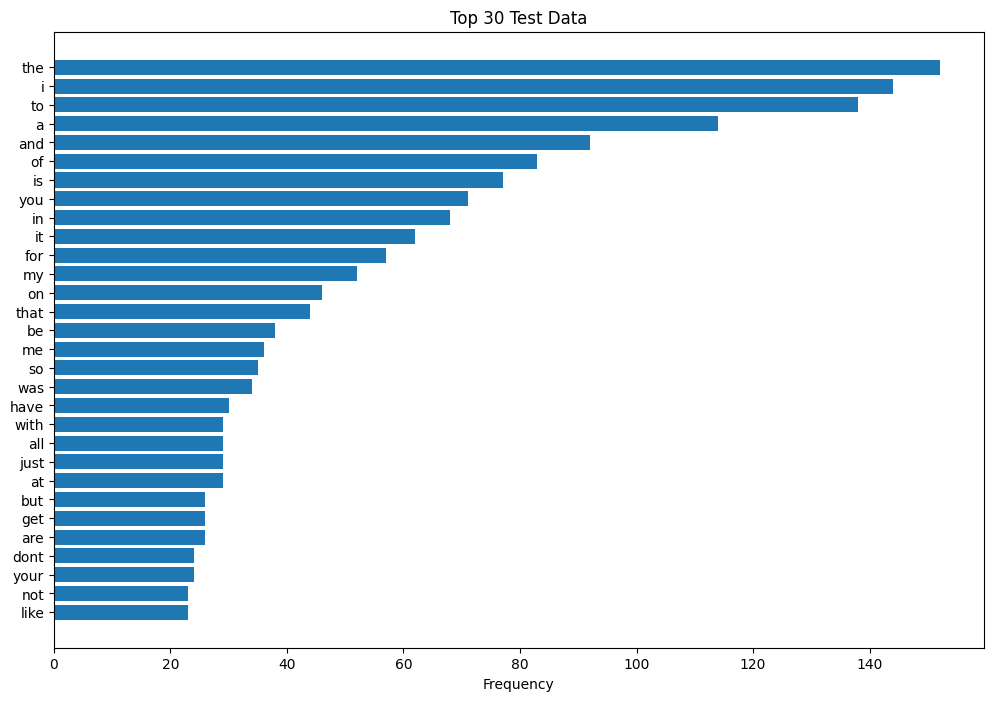

In [13]:
# Answer here
import string
import matplotlib.pyplot as plt
def plot_top_words(dataframe, title):
    # Text Processing: Merge, convert to lower, delete punctuantion, and split
    all_text = ' '.join(dataframe['text'].str.lower())
    cleaned_text = all_text.translate(str.maketrans('', '', string.punctuation))
    words = cleaned_text.split()

    # Calculate Frequency
    word_freq = {}
    for word in words:
        word_freq[word] = word_freq.get(word, 0) + 1

    # Sort by frequency
    sorted_words = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)

    # Retrive top 30 words
    top_30_words = sorted_words[:30]

    words_for_plot = [item[0] for item in top_30_words]
    freqs_for_plot = [item[1] for item in top_30_words]

    # Plot data
    plt.figure(figsize=(12, 8))
    plt.barh(words_for_plot, freqs_for_plot)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel('Frequency')
    plt.show()

plot_top_words(train_df, 'Top 30 Train Data')
plot_top_words(test_df, 'Top 30 Test Data')

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [14]:
import os
os.makedirs("./data", exist_ok=True)
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [15]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [16]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

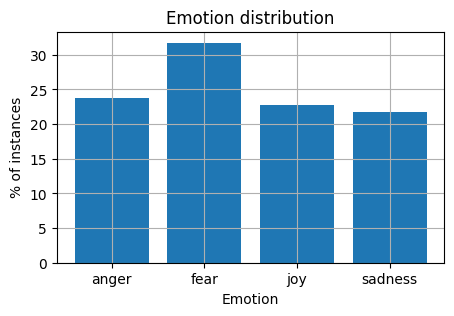

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [21]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [22]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [23]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [24]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [26]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [27]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [28]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [29]:
train_data_BOW_features_500.toarray()

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 2, 13,  0, ...,  0,  0,  0],
       [ 0,  6,  0, ...,  0,  0,  0]])

In [30]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [31]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Train vectorization
tfidf_1000.fit(train_df['text'])

# Transform training data to TF-IDF feature's matrix
train_data_tfidf_features_1000 = tfidf_1000.transform(train_df['text'])

# Get the feature names
feature_names = tfidf_1000.get_feature_names_out()
print(feature_names[100:110])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


['attacks' 'awareness' 'away' 'awe' 'awesome' 'awful' 'b' 'baby' 'back'
 'bad']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [34]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'sadness', 'anger', 'anger', 'fear', 'fear',
       'sadness', 'fear', 'fear'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [35]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [36]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [37]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [39]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

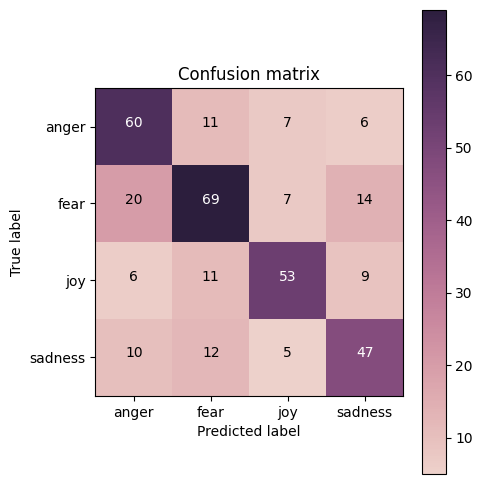

In [40]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
'''
The Diagonal: Correct Predictions
The numbers on the diagonal (from top-left to bottom-right) are the correct predictions (True Positives).
- 60 instances of Class A were correctly predicted as Class A.
- 69 instances of Class B were correctly predicted as Class B.
- 53 instances of Class C were correctly predicted as Class C.
- 47 instances of Class D were correctly predicted as Class D.

Off-Diagonal: Incorrect Predictions 
The numbers off the diagonal are the errors or misclassifications.
- Row 1 (Actual A): While 60 were correct, 11 were wrongly predicted as Class B, 7 as Class C, and 6 as Class D.
- Row 2 (Actual B): While 69 were correct, 20 were wrongly predicted as Class A, 7 as Class C, and 14 as Class D.
- Row 3 (Actual C): While 53 were correct, 6 were wrongly predicted as Class A, 11 as Class B, and 9 as Class D.
- Row 4 (Actual D): While 47 were correct, 10 were wrongly predicted as Class A, 12 as Class B, and 5 as Class C.
'''

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [41]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

# build Naive Bayes model
NB_model = MultinomialNB()

# training!
NB_model = NB_model.fit(X_train, y_train)

# predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

# so we get the pred result
print(y_test_pred[:10])

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=y_test_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)
'''Testing accuracy is better than Decision Tree'''

['anger' 'sadness' 'sadness' 'anger' 'anger' 'fear' 'fear' 'sadness' 'joy'
 'fear']
training accuracy: 0.79
testing accuracy: 0.71
              precision    recall  f1-score   support

       anger       0.65      0.67      0.66        84
        fear       0.74      0.81      0.77       110
         joy       0.77      0.70      0.73        79
     sadness       0.66      0.62      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347

[[56 14  5  9]
 [ 7 89  5  9]
 [11  7 55  6]
 [12 10  6 46]]


---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
'''
NB Testing accuracy is better than Decision Tree, but NB training accuracy is worse than Decision Tree.

The difference in performance can be explained by the fundamental ways these two algorithms work, especially when dealing with text data.
1. Naive Bayes (Probabilistic Model)
NB is essentially a probabilistic model. It calculates the likelihood of a document belonging to a certain class based on the words it contains. It makes a big, but often useful, simplification: that all words are independent of each other (the "naive" assumption).

Why NB Excelled in Testing:
- Better Generalization: NB is a low-variance model. It learns the broad, probabilistic trends—the gist of what makes a class a class—rather than memorizing specific examples. This means it's less prone to overfitting the noise in the training set and is much more reliable when encountering completely new, unseen text (the test set).
- Handles High-Dimensionality Gracefully: Text is a massive feature space (thousands of unique words). NB is computationally lightweight and thrives here. Its simple, strong assumptions keep the model from getting lost in the complexity of all those potential features.

2. Decision Tree (Rule-Based Model)
A Decision Tree is a rule-based model that builds a deep hierarchy of "if-then" rules. It tries to perfectly carve up the training data, for instance, learning that the specific presence of 'angry' combined with 'terrible day' means 'anger'.

Why DT Looked Good in Training but Failed in Testing:
- The Overfitting Trap: A single DT is a high-variance model. Its exceptional training accuracy suggests it likely overfit the data. It created highly specific, rigid rules that perfectly explained the training examples but were too brittle to apply to the test set. It essentially memorized the training answers instead of learning the underlying patterns.
- Struggles with Text Complexity: While a tree can model complexity, it can get overwhelmed by the sheer number of possible word combinations in text. The effort to build a perfect set of rules for the training data didn't translate into robust rules for the unpredictable nature of real-world text.
'''

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic1.png?raw=True)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [42]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [43]:
import keras

In [44]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4103 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [45]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2353    joy
2102    joy
2265    joy
2044    joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [46]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [47]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic2.png?raw=True)

In [48]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

I0000 00:00:1760872691.823044      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760872691.823988      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [49]:
from keras.callbacks import CSVLogger
import os
os.makedirs("./logs", exist_ok=True)
csv_logger = CSVLogger('./logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 500))
  warnings.warn(msg)
I0000 00:00:1760872701.143479     135 service.cc:148] XLA service 0x7cb350003610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760872701.144620     135 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760872701.144645     135 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760872701.459903     135 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/113 ━━━━━━━━━━━━━━━━━━━━ 5:31 3s/step - accuracy: 0.1562 - loss: 1.3812

I0000 00:00:1760872702.550948     135 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 38s 312ms/step - accuracy: 0.3289 - loss: 1.3551 - val_accuracy: 0.4841 - val_loss: 1.2695
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.6218 - loss: 1.0875 - val_accuracy: 0.6657 - val_loss: 0.9173
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.7959 - loss: 0.6154 - val_accuracy: 0.6945 - val_loss: 0.7685
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8575 - loss: 0.4108 - val_accuracy: 0.6945 - val_loss: 0.7893
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.8944 - loss: 0.3173 - val_accuracy: 0.6801 - val_loss: 0.8407
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9257 - loss: 0.2424 - val_accuracy: 0.6715 - val_loss: 0.8944
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9411 - loss: 0.1953 - val_accuracy: 0.6830 - val_loss: 0.9820
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9378 - loss: 0.1822 - val_accuracy: 0

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [51]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(128, 500))
  warnings.warn(msg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step


array([[9.7125208e-01, 2.2941162e-03, 1.8431775e-04, 2.6269531e-02],
       [1.3317588e-03, 1.1945150e-02, 1.7002171e-06, 9.8672140e-01],
       [1.2407310e-07, 9.4509829e-04, 2.1944828e-11, 9.9905473e-01],
       [7.5654045e-02, 9.2421877e-01, 3.4832792e-07, 1.2677444e-04],
       [9.9914539e-01, 6.5007691e-05, 5.6779559e-04, 2.2178933e-04]],
      dtype=float32)

In [52]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'sadness', 'sadness', 'fear', 'anger'], dtype=object)

In [53]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [54]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("./logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.369776,1.329044,0.484150,1.269529
1,1,0.659563,0.984708,0.665706,0.917319
2,2,0.794354,0.586941,0.694524,0.768530
3,3,0.851924,0.414016,0.694524,0.789263
4,4,0.885967,0.324165,0.680115,0.840685
5,5,0.916690,0.262636,0.671470,0.894380
6,6,0.931636,0.217234,0.682997,0.982000
7,7,0.939662,0.186472,0.674352,0.965877
8,8,0.949350,0.156640,0.685879,1.040640
9,9,0.961251,0.136863,0.682997,1.086059


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic3.png?raw=True)  ![pic4.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic4.png?raw=True)


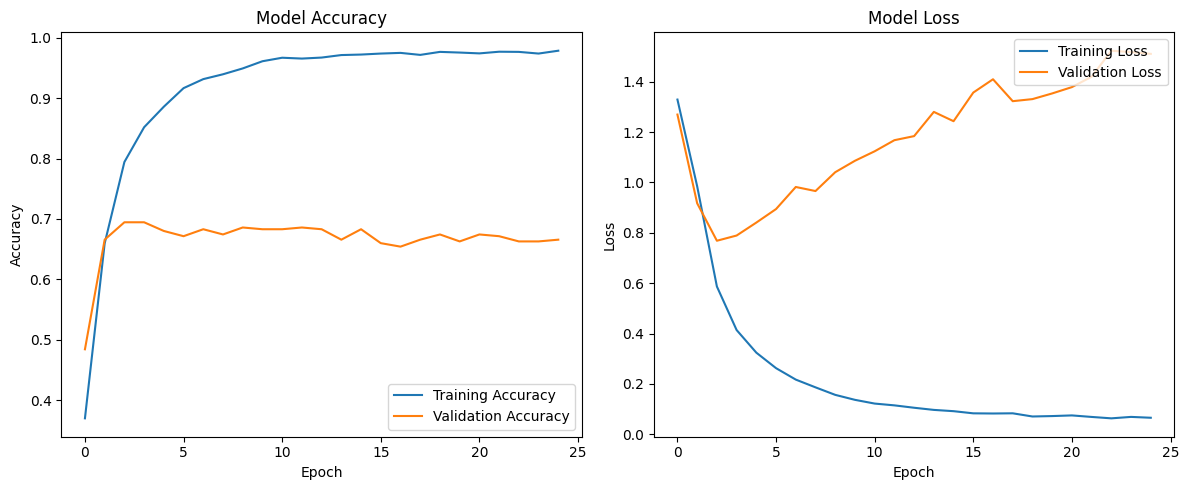

In [ ]:
# Answer here

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Training Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Training Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
'''
Overfitting
Characteristic:
1. Accuracy Plot: Training accuracy continues to climb towards 100%, while validation accuracy plateaus or even starts to drop. A significant gap opens up between the two lines.
2. Loss Plot: Training loss continues to decrease, while the validation loss begins to increase. This point where the validation loss bottoms out and starts to rise is the classic sign of overfitting.

The model has started to "memorize" the training data, including its noise and random fluctuations, instead of learning the generalizable patterns. Its performance on the training set looks great, but it fails badly when it sees new data.
'''

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [57]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2353,30349,"Vacation wise, Egypt offers great places, amaz...","[Vacation, wise, ,, Egypt, offers, great, plac..."
2102,30098,@airvistara as always it was indeed a wonderfu...,"[@, airvistara, as, always, it, was, indeed, a..."
2265,30261,@safaridjh but it's so aesthetically pleasing omg,"[@, safaridjh, but, it, 's, so, aesthetically,..."
2044,30040,@palmtreesarah @WorthingTheatre had more fun t...,"[@, palmtreesarah, @, WorthingTheatre, had, mo..."
3160,40333,untypical kinda Friday #dull,"[untypical, kinda, Friday, #, dull]"


In [58]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Vacation', 'wise', ',', 'Egypt', 'offers', 'great', 'places', ',', 'amazing', 'scenery', ',', 'bright', 'skies', 'and', 'good', 'weather', 'at', 'a', 'very', 'good', 'and', 'affordable', 'price', 'for', 'students', '.']),
       list(['@', 'airvistara', 'as', 'always', 'it', 'was', 'indeed', 'a', 'wonderful', 'experience', 'flying', 'with', 'you', 'guys', 'today', '#', 'bestinbusiness', '#', 'happyme']),
       list(['@', 'safaridjh', 'but', 'it', "'s", 'so', 'aesthetically', 'pleasing', 'omg'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [59]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [60]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 2.7836898e-01,  3.0366889e-01,  1.5792981e-01, -3.2856297e-01,
       -2.6810610e-01, -7.1617651e-01,  5.2686960e-01,  1.2850387e+00,
       -3.3051485e-01, -7.0355052e-01, -5.4998463e-01, -1.7388909e-01,
       -1.8161486e-01,  3.0062115e-01, -2.3352052e-01, -4.8558870e-01,
        2.4486212e-01, -5.8061129e-01, -3.2667110e-03, -1.3245736e+00,
        1.2123300e+00,  4.4740218e-01,  6.6673100e-01,  4.3023829e-04,
        1.1748502e-01,  5.6718323e-02, -7.3042268e-01,  4.9200106e-01,
       -3.9734331e-01,  3.8467667e-01,  1.9265041e-01,  3.6185509e-01,
        5.3052366e-01, -3.8678205e-01,  2.4721189e-01,  6.1995274e-01,
        1.6041780e-01, -3.0992365e-02, -6.5892696e-01, -5.0645441e-02,
       -8.2161069e-02, -1.0619907e-01, -8.9854315e-02,  3.3300856e-01,
        3.7831706e-01, -3.2486737e-01, -4.9620223e-01,  2.1582378e-01,
        4.4633695e-01,  4.7883931e-01,  1.4172275e-01, -5.4422849e-01,
       -2.6890352e-01, -2.3739589e-02, -5.6432617e-01,  7.1033835e-02,
      

In [61]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9416155219078064),
 ('trusted', 0.9274143576622009),
 ('birthday', 0.9192665219306946),
 ('O', 0.9135857820510864),
 ('help', 0.9124836325645447),
 ('bu', 0.9098119139671326),
 ('blessed', 0.9066766500473022),
 ('smile', 0.9042983055114746),
 ('free', 0.9020844101905823),
 ('dad', 0.9009628295898438)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [62]:
from gensim.models import KeyedVectors

## Note: this model is huge, this will take some time ...
model_path = "/kaggle/input/google-news-vectors/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286198616028),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949078559875),
 ('excited', 0.6247666478157043)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[=-------------------------------------------------] 2.8% 3.0/104.8MB downloaded

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
'''
1. Averaging Word Vectors: This technique calculates the mean of all word vectors in a sentence to produce a single vector representing the sentence. It is simple and fast, and it often works reasonably well, although it ignores the order of words and the grammatical structure.
2. Weighted Averaging (e.g., TF-IDF): In this approach, each word vector is weighted according to its importance, such as using TF-IDF scores. Words that carry more semantic information contribute more to the final sentence vector, making the representation more informative than simple averaging.
3. Sequence Models (LSTM/GRU): Sequence-based models process each word in the order it appears in the sentence, allowing the model to capture contextual dependencies between words. The hidden state at the last step can then serve as a vector representing the whole sentence, making it sensitive to word order.
4. Transformer-based Models (e.g., BERT): Transformers generate contextual embeddings for each word based on its surrounding words, capturing both meaning and context. A special token, such as [CLS], can be used to obtain a vector representation for the entire sentence, which is often more powerful than traditional methods.
5. Convolutional Neural Networks (CNNs) for Sentences: This method treats a sentence as a sequence of word vectors and applies convolutional filters to detect local patterns, like n-grams. The resulting feature maps are pooled to create a fixed-size vector that represents the sentence, effectively capturing local dependencies between words.
'''

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic5.png?raw=True)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [65]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [66]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic6.png?raw=True)

In [67]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [68]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic7.png?raw=True)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/pics/pic9.png?raw=True)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [69]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

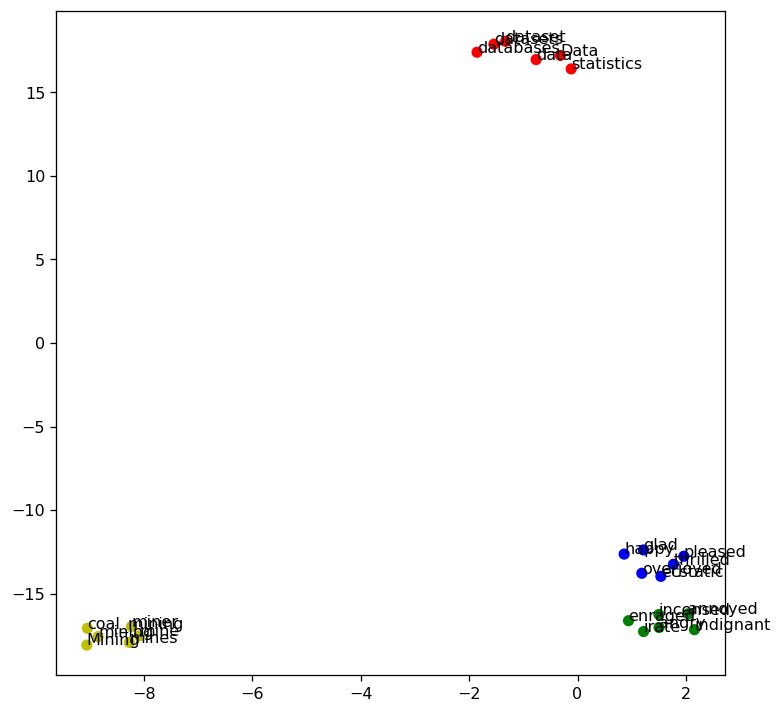

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

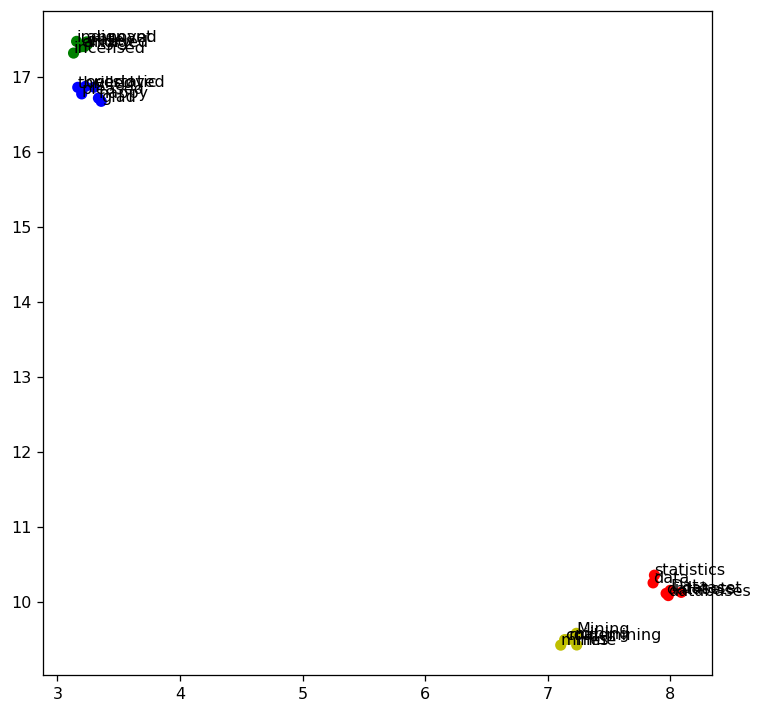

In [71]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Running t-SNE...


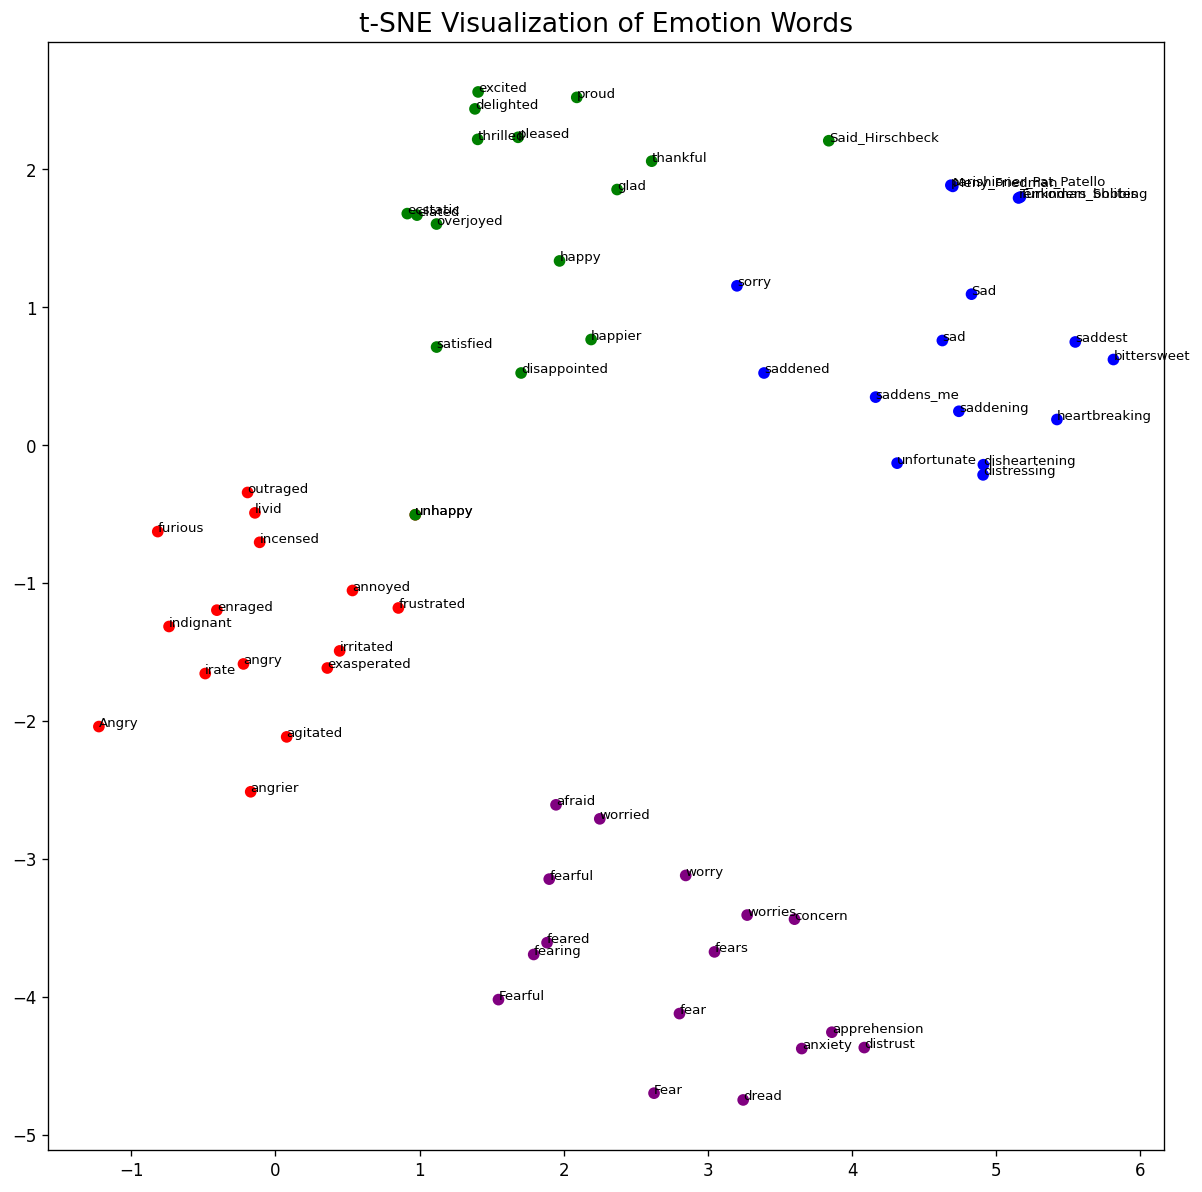


Running UMAP...


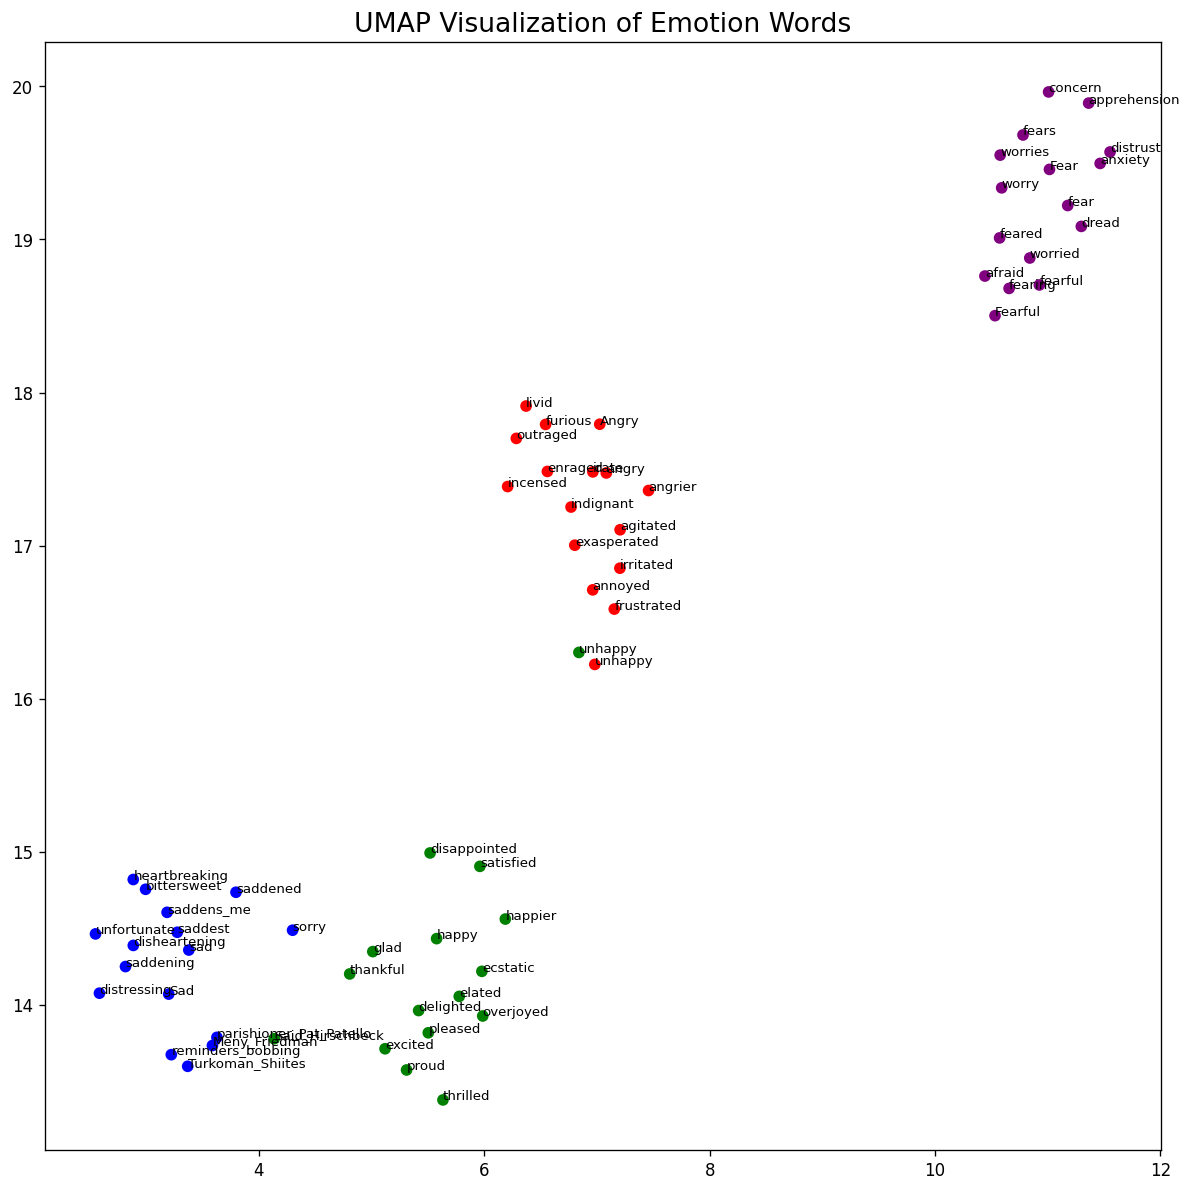

In [ ]:
# Answer here
# The four seed words for our emotion clusters
seed_words = ["angry", "happy", "sad", "fear"]
target_words = []
colors = []

# Define colors for each cluster
color_map = {'angry': 'red', 'happy': 'green', 'sad': 'blue', 'fear': 'purple'}

# Find the 15 most similar words for each seed word
for word in seed_words:
    target_words.append(word)
    colors.append(color_map[word])
    
    similar_words = w2v_google_model.most_similar(word, topn=15)
    for sim_word, _ in similar_words:
        target_words.append(sim_word)
        colors.append(color_map[word])

# Get the corresponding vectors from the Word2Vec model
X_train = w2v_google_model[target_words]

# Generate t-SNE Visualization

print("Running t-SNE...")
# Initialize and train the t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train)

# Plot the t-SNE result
plt.figure(figsize=(12, 12), dpi=120)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)
plt.title('t-SNE Visualization of Emotion Words', fontsize=16)
for label, x, y in zip(target_words, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=8)
plt.show()

# Generate UMAP Visualization
print("\nRunning UMAP...")
# Initialize and train the UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28, n_neighbors=15, min_dist=0.1)
X_umap = umap_model.fit_transform(X_train)

# Plot the UMAP result
plt.figure(figsize=(12, 12), dpi=120)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors)
plt.title('UMAP Visualization of Emotion Words', fontsize=16)
for label, x, y in zip(target_words, X_umap[:, 0], X_umap[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=8)
plt.show()

In [ ]:
'''
1. t-SNE:
- Excellent at forming tight clusters for each emotion.
- Distances between clusters are often not meaningful.
- Can look “fragmented” or isolated due to random initialization.
2. UMAP:
- Preserves both local and some global structure.
- Clusters may overlap slightly.
- Inter-cluster distances are more meaningful compared to t-SNE.
- Often produces a more continuous, less “scattered” map.
'''

---